<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-4.3:-Measurements" data-toc-modified-id="Lab-4.3:-Measurements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab 4.3: Measurements</a></span><ul class="toc-item"><li><span><a href="#1.-Forward-Feature-Selection" data-toc-modified-id="1.-Forward-Feature-Selection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Forward Feature Selection</a></span><ul class="toc-item"><li><span><a href="#1.1-Load-Diabetics-Data-Using-datasets-of-sklearn" data-toc-modified-id="1.1-Load-Diabetics-Data-Using-datasets-of-sklearn-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1 Load Diabetics Data Using datasets of sklearn</a></span></li><li><span><a href="#1.2-Use-Forward-Feature-Selection-to-pick-a-good-model" data-toc-modified-id="1.2-Use-Forward-Feature-Selection-to-pick-a-good-model-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1.2 Use Forward Feature Selection to pick a good model</a></span></li></ul></li></ul></li></ul></div>

![alt text](https://i.imgur.com/1WaY7aA.png)

# Black Cat Data - Data Science and AI
## Lab 4.3: Measurements

In [1]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [2]:
## Load the Diabetes Housing dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [3]:
# Description
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [4]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [6]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# Target
y = diabetes.target

In [7]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [37]:
def forward_selection(model, X, y, test_size=0.2, random_state=42, show_steps=True):
    
    """
    Perform forward selection of features for sklearn model instance
    
    model: sklearn model instance
    X: predictors as pandas DataFrame
    y: target as pandas Series
    test_size: size of test data as fraction to pass to train_test_split (default is 0.2)
    random_state: random number seed to pass to train_test_split (default is 42)
    show_steps: print feature selection steps (default is True)
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'r2': 0, 'a_r2': 0}
    # get the number of cases in the test data
    n = X_test.shape[0]
    
    # initialise lists for storing features, r2 and adjusted r2
    features = []
    r2_list = []
    adjusted_r2_list = []
    
    while True:
        changed = False

        if show_steps == True:
            print('') 

        # list the features to be evaluated
        excluded = list(set(X.columns) - set(included))

        if show_steps == True:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps == True:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            r2 = model.score(X_test[included + [new_column]], y_test) # calculate the score
            # append r2 to list
            r2_list.append(r2)
            # append selected features to list
            features.append(included + [new_column])
            # number of predictors in this model
            k = len(included + [new_column])
            # calculate the adjusted R^2
            adjusted_r2 = 1 - (((1 - r2)*(n-1)) / (n-k-1)) # calculate the Adjusted R^2
            # Append adjusted r2 to list
            adjusted_r2_list.append(adjusted_r2)

            if show_steps == True:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
            if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps == True:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
        # END for

        # if found a better model after testing all remaining features
        if changed == True:
            # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['feature'], best['r2'], best['a_r2']))
        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))
    
    # Create pandas DataFrame of model scores 
    
    df = pd.DataFrame({'Num_features': [len(i) for i in features], # Add column with number of features included
                       'Features': [', '.join(i) for i in features], # Add column with names of features included
                       'R2': r2_list,
                       'Adjusted_R2': adjusted_r2_list})
    
    return df

In [38]:
# Perform forward selection

r2_scores = forward_selection(LinearRegression(), X, y)


(Step) Excluded = s5, sex, s4, s6, bmi, s1, s2, s3, age, bp
(Step) Trying s5...
(Step) - Features = s5
(Step) - Adjusted R^2: This = 0.376; Best = 0.000
(Step) - New Best!   : Feature = s5; R^2 = 0.383; Adjusted R^2 = 0.376
(Step) Trying sex...
(Step) - Features = sex
(Step) - Adjusted R^2: This = -0.021; Best = 0.376
(Step) Trying s4...
(Step) - Features = s4
(Step) - Adjusted R^2: This = 0.187; Best = 0.376
(Step) Trying s6...
(Step) - Features = s6
(Step) - Adjusted R^2: This = 0.100; Best = 0.376
(Step) Trying bmi...
(Step) - Features = bmi
(Step) - Adjusted R^2: This = 0.225; Best = 0.376
(Step) Trying s1...
(Step) - Features = s1
(Step) - Adjusted R^2: This = 0.045; Best = 0.376
(Step) Trying s2...
(Step) - Features = s2
(Step) - Adjusted R^2: This = 0.034; Best = 0.376
(Step) Trying s3...
(Step) - Features = s3
(Step) - Adjusted R^2: This = 0.176; Best = 0.376
(Step) Trying age...
(Step) - Features = age
(Step) - Adjusted R^2: This = -0.003; Best = 0.376
(Step) Trying bp...
(St

In [42]:
# Sort scores by descending adjusted r2

r2_scores.sort_values('Adjusted_R2', ascending=False)

,Num_features,Features,R2,Adjusted_R2
13,2,"s5, bmi",0.452292,0.439555
19,3,"s5, bmi, sex",0.457063,0.437900
24,3,"s5, bmi, s3",0.455605,0.436391
26,3,"s5, bmi, bp",0.454331,0.435072
20,3,"s5, bmi, s4",0.453650,0.434367
21,3,"s5, bmi, s6",0.453480,0.434191
25,3,"s5, bmi, age",0.448840,0.429388
22,3,"s5, bmi, s2",0.447778,0.428288
23,3,"s5, bmi, s1",0.445095,0.425510
16,2,"s5, s3",0.404000,0.390140


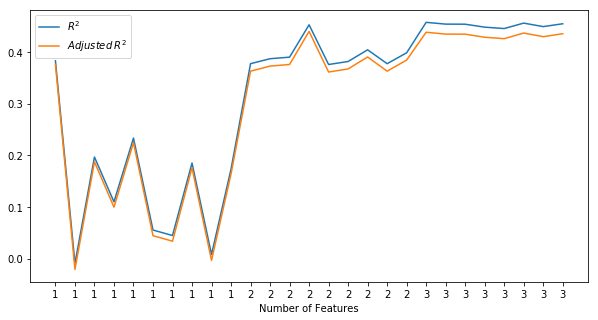

In [41]:
## Chart both R^2 and Adjusted R^2

# position
_range = range(1, len(r2_list)+1)
# xtick labels
features_len = r2_scores['Num_features']

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_scores['R2'], label = '$R^2$')
plt.plot(_range, r2_scores['Adjusted_R2'], label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xticks(_range, labels=[str(i) for i in features_len])
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()